In [1]:
import gzip
import six.moves.cPickle as pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def encode_label(j):
  e = np.zeros((10, 1))
  e[j] = 1.
  return e

In [3]:
def shape_data(data):
  features = [np.reshape(x, (784, 1)) for x in data[0]]
  labels = [encode_label(y) for y in data[1]]
  return [o for o in zip(features, labels)]

In [4]:
def load_data():
  f = np.load('../../data/mnist.npz')
  (x_train, y_train) = f['x_train'], f['y_train']
  (x_test, y_test) = f['x_test'], f['y_test']
  f.close()
  return shape_data((x_train, y_train)), shape_data((x_test, y_test))

In [5]:
#compute the average over data
def average_digit(data, digit):
  filtered = [x[0] for x in data if np.argmax(x[1]) == digit]
  filtered_array = np.asarray(filtered)
  return np.average(filtered_array, axis=0)

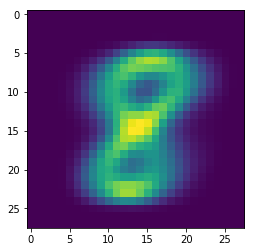

In [6]:
train_data, test_data = load_data()
avg_eight = average_digit(train_data, 8)
img = (np.reshape(avg_eight, (28, 28)))
plt.imshow(img)
plt.show()

In [7]:
def sigmoid_double(x):
  return 1. / (1. + np.exp(-x))

def sigmoid(z):
  return np.vectorize(sigmoid_double)(z)

In [8]:
def predict(x, W, b):
  return sigmoid_double(np.dot(W, x) + b)

w = np.transpose(avg_eight)
b = -45

x_3 = train_data[2][0]
x_18 = train_data[17][0]

print(predict(x_3, w, b))
print(predict(x_18, w, b))

[[1.]]
[[1.]]


In [9]:
def evaluate(data, digit, threshold, W, b):
  total_samples = 1.* len(data)
  correct_predictions = 0
  for x in data:
    if predict(x[0], W, b) > threshold and np.argmax(x[1]) == digit:
      correct_predictions += 1
    if predict(x[0], W, b) <= threshold and np.argmax(x[1]) != digit:
      correct_predictions += 1
  return correct_predictions / total_samples

In [10]:
evaluate(train_data, 8, 0.5, w, b)

0.09751666666666667

In [11]:
evaluate(test_data, 8, 0.5, w, b)

0.0974

In [12]:
eight_test = [x for x in test_data if np.argmax(x[1]) == 8]
evaluate(eight_test, 8, 0.5, w, b)

1.0